In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.viridis()

In [3]:

# Inputs
f_mean = 20 #Hz
f_base = 5 #Hz
f_peak = 152.8 #Hz
sigma_stim = 2
t_stim = 0.02 #s

rate = f_base + f_peak

40.1 80.2

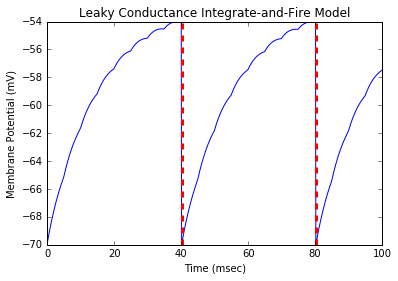

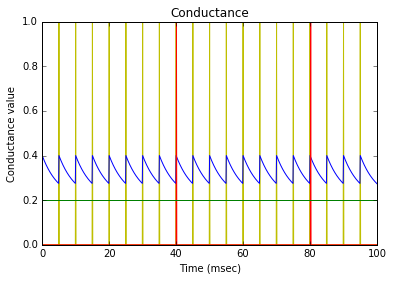

In [31]:
## setup parameters and state variables
rate    = 200                # per sec
T       = 100                  # total time to simulate (msec)
dt      = 0.1               # simulation time step (msec)
time    = np.arange(0, T+dt, dt) # time array
t_rest  = 0                   # initial refractory time
no_spikes = 0
poisson_presynaptic_spikes = np.clip(np.random.poisson(rate/1000., len(time)), 0, 1)
regular_presynaptic_spikes = np.zeros(len(time))
x = [int(i * (len(time)//(float(rate) / 1000. * T))) for i in range(int(float(rate) / 1000. * T))]
regular_presynaptic_spikes[x] = 1.
previous_spike = 0.
output_spikes = np.zeros(len(time))
    
# Membrane
v_rest = -70 #mV
e_ext = 0 #V
v_thr = -54 #mV
g_max = 0.2
tau_m = 20. #ms
tau_ex = 5. #ms
    

## LIF properties
Vm      = np.ones(len(time)) * v_rest    # potential (V) trace over time
Rm      = 1                   # resistance (kOhm)
Cm      = 10                  # capacitance (uF)
tau_ref = dt * 3                  # refractory period (msec)
Vth     = 1                   # spike threshold (V)
V_spike = 1                 # spike delta (V)
g = np.ones(len(time))*g_max
# g[0] = g_max
g_const = g_max
trace = np.zeros(len(time))
trace[0] = g_const


# STDP
a_plus = 0.1
b = 1.2
tau_plus = 20. #ms
tau_minus = 64. #ms
a_minus = (a_plus * tau_plus * b) / tau_minus

def F(delta_t):
    
    if delta_t < 0:
        return a_plus * np.e ** (float(delta_t) / tau_plus)
    else:
        return -a_minus * np.e ** (-float(delta_t) / tau_minus) 


## iterate over each time step
for i, t in enumerate(time): 
    if regular_presynaptic_spikes[i]:
        previous_spike = t
        g[i] = g_max
    delta_t = (t - previous_spike)
    g[i] = g[i] + g_const * np.e ** (-delta_t/float(tau_ex))
    Vm[i] = Vm[i-1] + ((v_rest-Vm[i-1] + g[i] * (e_ext - Vm[i-1])) / tau_m )* dt
    if Vm[i] >= v_thr:
        Vm[i] = v_rest
        no_spikes += 1
        t_rest = t + tau_ref
        output_spikes[i] = 1
        
        g_const = np.clip(g_const + g_max * F(-delta_t), 0, g_max)
    trace[i] = g_const
        
            

## plot membrane potential trace
plt.plot(time, Vm)
plt.title('Leaky Conductance Integrate-and-Fire Model')
plt.ylabel('Membrane Potential (mV)')
plt.xlabel('Time (msec)')
for i, t in enumerate(time):
    if output_spikes[i] == 1:
        plt.axvline(t, ls='--', c='r', lw=3)
        print t, 
# plt.ylim([0,2])
plt.figure()
## plot membrane potential trace
plt.plot(time, regular_presynaptic_spikes, 'y')
plt.plot(time, g)
plt.plot(time, output_spikes, 'r')
#g_const
plt.plot(time, trace, 'g')
plt.title('Conductance')
plt.ylabel('Conductance value')
plt.xlabel('Time (msec)')
# plt.figure()
# plt.plot(time, regular_presynaptic_spikes)
# plt.plot(time, output_spikes, 'r')


In [240]:
print "empirical fireing rate (per sec) = ", float(no_spikes) / T * 1000. 
empiricical_rate = float(no_spikes) / T * 1000.

empirical fireing rate (per sec) =  20.0


In [241]:
f_base + f_peak

157.8

In [30]:
np.asarray(np.nonzero(regular_presynaptic_spikes)) / 1000.

array([[ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95]])